In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Densité spectrale du bruit d'une machine à laver

In [2]:
from scipy.io.wavfile import read
samplerate, amplitude = read('data/machine_a_laver.wav')

In [3]:
print('Taux echantillonage :', samplerate)
N = len(amplitude)
print('Nb de points N :', N)
Delta_t = 1/samplerate
print('Delta t', Delta_t)
T = N*Delta_t
print('Durée mesure :', T)

Taux echantillonage : 44100
Nb de points N : 414380
Delta t 2.2675736961451248e-05
Durée mesure : 9.396371882086168


Text(0.5,0,'Temps (s)')

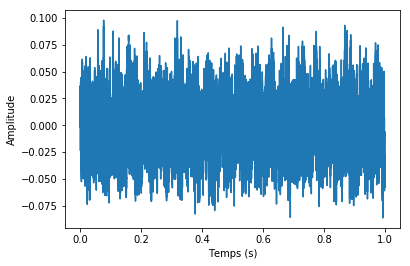

In [4]:
N_plot = samplerate
x_plot = np.arange(N_plot)*Delta_t
# NE PAS UTILISER np.linspace(0, 1, N_plot)
y_plot = amplitude[-N_plot:]
plt.plot(x_plot, y_plot)
plt.ylabel('Amplitude')
plt.xlabel('Temps (s)')

In [5]:
from scipy.signal import periodogram
freq, psd = periodogram(amplitude, samplerate, )

(1e-10, 0.001)

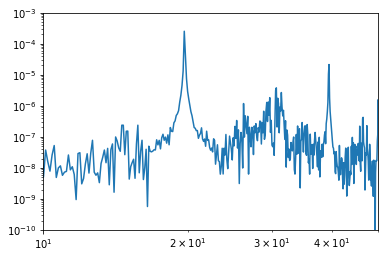

In [6]:
# Avec xlim
plt.loglog(freq, psd)
plt.xlim(10, 50)
plt.ylim(1E-10, 1E-3)

Text(0,0.5,'Densité de puissance ($V^2/Hz$)')

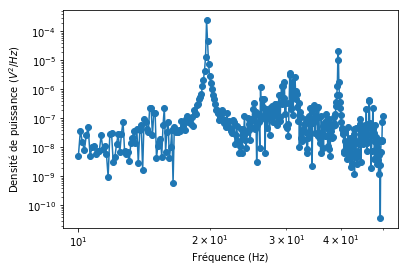

In [7]:
mask = (freq>10) & (freq<50)
plt.loglog(freq[mask], psd[mask], '-o')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Densité de puissance ($V^2/Hz$)')

In [8]:
i_max = psd[mask].argmax()
freq[mask][i_max]*60 # rpm

1181.3070128867223

In [9]:
delta_f = 1/T
print('Puissance moyenne :', amplitude.var())
print('Integrale DSP     :', np.sum(psd)*delta_f)

Puissance moyenne : 0.0006080771214276875
Integrale DSP     : 0.0006080771214276875


In [10]:
print( amplitude.std())


0.024659219805737723


In [11]:
mask = (freq>18) & (freq<21)
puissance_signal = np.sum(psd[mask])*delta_f
puissance_bruit = np.sum(psd[~mask])*delta_f
print('Puissance signal : ', puissance_signal)
print('Puissance bruit : ', puissance_bruit)
print('Rapport signal à bruit', puissance_signal/puissance_bruit)

Puissance signal :  3.5673495954542404e-05
Puissance bruit :  0.0005724036254731448
Rapport signal à bruit 0.06232227464501983


Puissance signal filtré:  4.610444813862146e-05


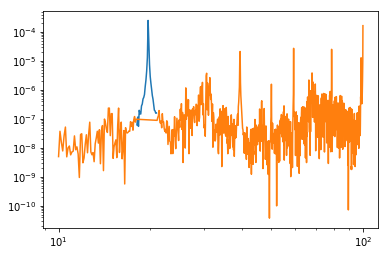

In [12]:
# Le bruit typique est de 1E-7
# On peut filtrer sur environ 100Hz pour avoir un rapport signal à bruit de 1
filtre = (freq>10) & (freq<100)
print('Puissance signal filtré: ', np.sum(psd[(~mask) & filtre])*delta_f)

plt.loglog(freq[(mask) & filtre], psd[(mask) & filtre])
plt.loglog(freq[(~mask) & filtre], psd[(~mask) & filtre])

## Filtre en Python

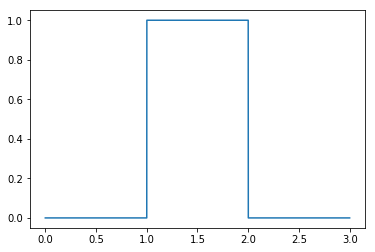

In [13]:
samplerate = 44100
signal = np.zeros(samplerate*3)
signal[samplerate:(samplerate*2)] = 1
x = np.arange(samplerate*3)*Delta_t
plt.plot(x, signal)

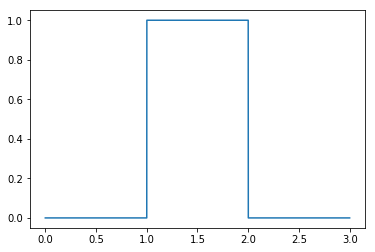

In [14]:
import numpy as np
signal_tilde = np.fft.rfft(signal)
signal_2 = np.fft.irfft(signal_tilde)
plt.plot(x, signal_2)

In [15]:
freqs = np.fft.rfftfreq(len(signal), Delta_t)
freqs[0] # 0
freqs[1] # 1/T soit 0.333
freqs[2] # 2/T soit 0.666
len(freqs) # environ N/2
freqs[-1] # samplerate/2 soit 22050

22050.0

In [22]:
def passe_bas(signal, f_c, samplerate=44100):
    signal_tilde = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
    H = 1/(1+1J*(freqs/f_c))
    signal_2 = np.fft.irfft(H*signal_tilde)
    return signal_2

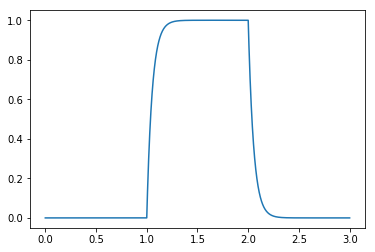

In [23]:
plt.plot(x, passe_bas(signal_2, 3))1.12625945e+09

In [28]:
def passe_haut(signal, f_c, samplerate=44100):
    signal_tilde = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
    H = 1J*(freqs/f_c)/(1+1J*(freqs/f_c))
    signal_2 = np.fft.irfft(H*signal_tilde)
    return signal_2

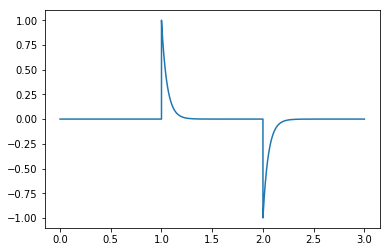

In [29]:
plt.plot(x, passe_haut(signal_2, 3))

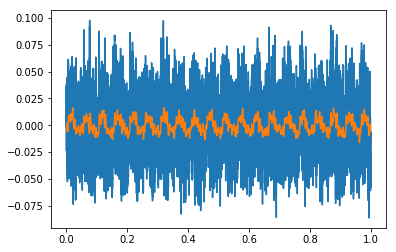

In [34]:
samplerate, amplitude = read('data/machine_a_laver.wav')
Delta_t = 1/samplerate
N_plot = samplerate
x_plot = np.arange(N_plot)*Delta_t
plt.plot(x_plot, amplitude[-N_plot:])
plt.plot(x_plot, pass_bas(amplitude[-N_plot:], 30))

## Onde gravitationnelle

In [17]:
from readligo import loaddata
filename_H1 = 'data/H-H1_LOSC_4_V1-1126259446-32.hdf5'
strain_H1, time_H1, chan_dict_H1 = loaddata(filename_H1, 'H1')

/users/ens/clade/lumi/2019/Lumi2019/densite_spectrale_de_puissance/readligo.py:132: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  shortnameArray = dqInfo['DQShortnames'].value
/users/ens/clade/lumi/2019/Lumi2019/densite_spectrale_de_puissance/readligo.py:138: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  injnameArray = injInfo['InjShortnames'].value
/users/ens/clade/lumi/2019/Lumi2019/densite_spectrale_de_puissance/readligo.py:143: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  gpsStart = meta['GPSstart'].value


In [39]:
Delta_t = time_H1[1] - time_H1[0]
samplerate = 1/Delta_t
samplerate
N = len(strain_H1)
T = N*Delta_t
T
time_H1[0]

1126259446.0

In [40]:
t_detection = time_H1[N//2]
print('instant detection', t_detection)

instant detection 1126259462.0


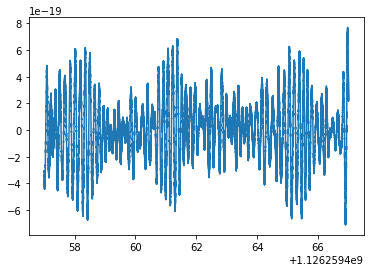

In [41]:
mask = np.abs(time_H1 - t_detection)<5
plt.plot(time_H1[mask], strain_H1[mask])

In [53]:
from scipy.signal import welch
f, psd = welch(strain_H1, samplerate, nperseg=samplerate)
f_periodogram, psd_periodogram = periodogram(strain_H1, samplerate)

Text(0,0.5,'DSP ($Hz^-1$)')

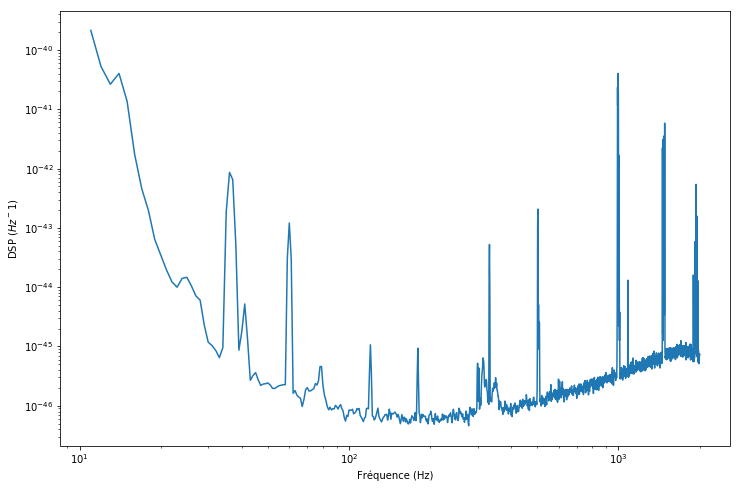

In [57]:
mask = (f>10) & (f<2E3)
plt.figure(figsize=(12,8))
plt.loglog(f[mask], psd[mask])
mask_periodogram = (f_periodogram>10) & (f_periodogram<2E3)
#plt.loglog(f_periodogram[mask_periodogram], psd_periodogram[mask_periodogram])

plt.xlabel('Fréquence (Hz)')
plt.ylabel('DSP ($Hz^-1$)')

In [ ]:
from scipy.interpolate import interp1d    

def whiten(strain, dt):
    freqs_welch, psd_welch = welch(strain, fs=1/dt, nperseg=int(1/dt))
    interp_psd = interp1d(freqs_welch, psd_welch)

    strain_tilde = np.fft.rfft(strain)
    N = len(strain)
    freqs = np.fft.rfftfreq(N, dt)

    gain = 1 / np.sqrt(interp_psd(freqs))
    gain = gain/gain.max()
    white_strain_tilde = strain_tilde * gain
    white_strain = np.fft.irfft(white_strain_tilde)